#  Intro to Quantum Computing
### Tutorial 6: Quantum Error Correction

|||
|-|-|
|**Author:** |Bernardo Villalba|
|**Date:** |Jun 28th, 2024|
|**Tutorial 6:** |**1.00**<br/>*Quantum Error Correction*|
|**License:** |MIT License / Bernardo Villalba|
|**Qiskit:** |1.1.0|
|**Contact:** | b.r.villalba.frias@hva.nl


In [1]:
%matplotlib inline
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.primitives import Sampler
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import plot_distribution

import numpy as np

The following cell contains some useful definitions and functions for the development of this tutorial.

In [2]:
# Function: state_to_dirac(quantum_state)
#
# 
# This function accepts an arbitrary state vector and prints it in its
# corresponding Dirac notation.
def state_to_dirac(state):

    # Convert the statevector to dictionary form.
    state_to_dict = state.to_dict()

    return ' '.join('{1:+.4f}|{0}>'.format(key, value)
                      for key, value in state_to_dict.items())


# Function: obtain_vector(quantum_circuit)
#
# 
# This function accepts an arbitrary circuit, performs its state vector
# simulation and returns the resulting vector state.
def obtain_vector(qc):

    # Execute the state vector simulation
    resulting_vector = Statevector(qc)

    # Convert the resulting state vector in its Dirac notation
    dirac_vector = state_to_dirac(resulting_vector)

    return resulting_vector, dirac_vector


# Function: simulate_circuit(quantum_circuit, number_shots)
#
# 
# This function accepts an arbitrary circuit, performs a multi-shot
# simulation and returns the results.
def simulate_circuit(qc, trials = 100000):

    # Execute the simulation for the given number of shots
    job = Sampler().run([qc], shots = trials)

    # Collect the results from the job
    result = job.result()

    # Obtain the counts from the results
    statistics = result.quasi_dists[0].binary_probabilities()

    return result, statistics

As in previous exercises, you will implement some of the quantum algorithms that have been discussed (and others than not). You can use whatever simulator you consider useful to solve them. Read carefully the exercises and identify the most suitable simulator for your purposes. 

Moreover, you will have to setup your own `Quantum Circuit` because each algorithm is different, hence your solution should include the complete setup process to create and simulate the requested quantum circuit.

## Exercise 1

During the presentation on "Quantum Error Correction", I introduced the bit-flip code which was able to detect up to `2 X-errors`, however, it can only correct one. You are going to implement, step by step, such code using the following quantum circuit:

![Exercise1](img/exercise1.png)

Assemble the section of the circuit corresponding to the preparation of the initial state (you could use [barrier](https://docs.quantum.ibm.com/api/qiskit/circuit#barrier) to separate the sections) and draw the resulting circuit.

In [3]:
# Solution


In the next step, the quantum state from a single physical qubit is encoded into a logical qubit (using 3 physical qubits). This section is called the `Encode State Section`. Assemble this section of the circuit and draw the resulting circuit.

You could use [compose](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#compose) to incrementally build your circuit from the different sections.

In [4]:
# Solution


Now it is time to introduce some failures in the quantum channel. Initially, you are going to introduce `1 X-error`, randomly generating an `X-error` in this section of the circuit. Flip the corresponding qubit and draw the resulting circuit.

Maybe later you can try introducing more than 1 error to see what happens with the circuit.

In [5]:
# Solution


Go ahead and assemble the `Extract Error Syndrome Section` (just before the classical logic gates) and draw the resulting circuit.

In [6]:
# Solution


Continue assembling the bit-flip circuit by creating the `Error Syndrome Decoder Section` and applying the corrections directly on the data qubits.

This decoder could be implemented using conditional gates: [c_if](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.Gate#c_if), where you apply a certain gate based on the condition given by a classical bit (obtained from a measurement). For instance: `quantum_circuit.gate().c_if(classic_register, value)`. Draw the resulting circuit.

In [7]:
# Solution


Finalize assembling the bit-flip circuit by creating the `Decode State Section`. Draw the resulting circuit and print the resulting probabilty distribution.

In [8]:
# Solution


In [9]:
# Solution



## Exercise 2

At this point, you have been able to build the bit-flip error correction code and test it with one single `X-error`. During the presentation, we discussed what would happen when `2 X-errors` were introduced.

Assemble a quantum circuit with `2 X-errors` (randomly choose the faulty qubits) and verify the behaviour of the quantum system. What could you observe? Does the result align with what we discuss?

In [10]:
# Solution


In [11]:
# Solution


## Exercise 3

During the presentation on "Quantum Error Correction", I also introduced the phase-flip code which was able to detect and correct `1 Z-error`. Assemble the quantum circuit representing this error correction code and verify its behaviour when `1 Z-error` is introduced.

The quantum circuit is represented as follow:
![Exercise3](img/exercise3.png)

In [12]:
# Solution


## Exercise 4

The previously presented circuit can be further improved into a shorter version. It provides the same funtionality but uses less number of qubits. Hence,l et's give it a try. Assemble the following circuit, draw the resulting ciruit and perform a simulation to determine if the error were corrected or not. The quantum circuit is represented as follow:
![Exercise4](img/exercise4.png)

In [13]:
# Solution


## Exercise 5

During the lecture: "Quantum Error Correction", I briefly presented the Shor code which was able to detect and correct `1 X-error` and `1 Z-error`. Unfortunately, the `Error Syndrome Decoder Section` was too complex to present. Assemble the quantum circuit representing the first 3 sections of the Shor error correction code and draw the circuit.

The quantum circuit is represented as follow:
![Exercise5](img/exercise5.png)

In [44]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import numpy as np

%matplotlib inline

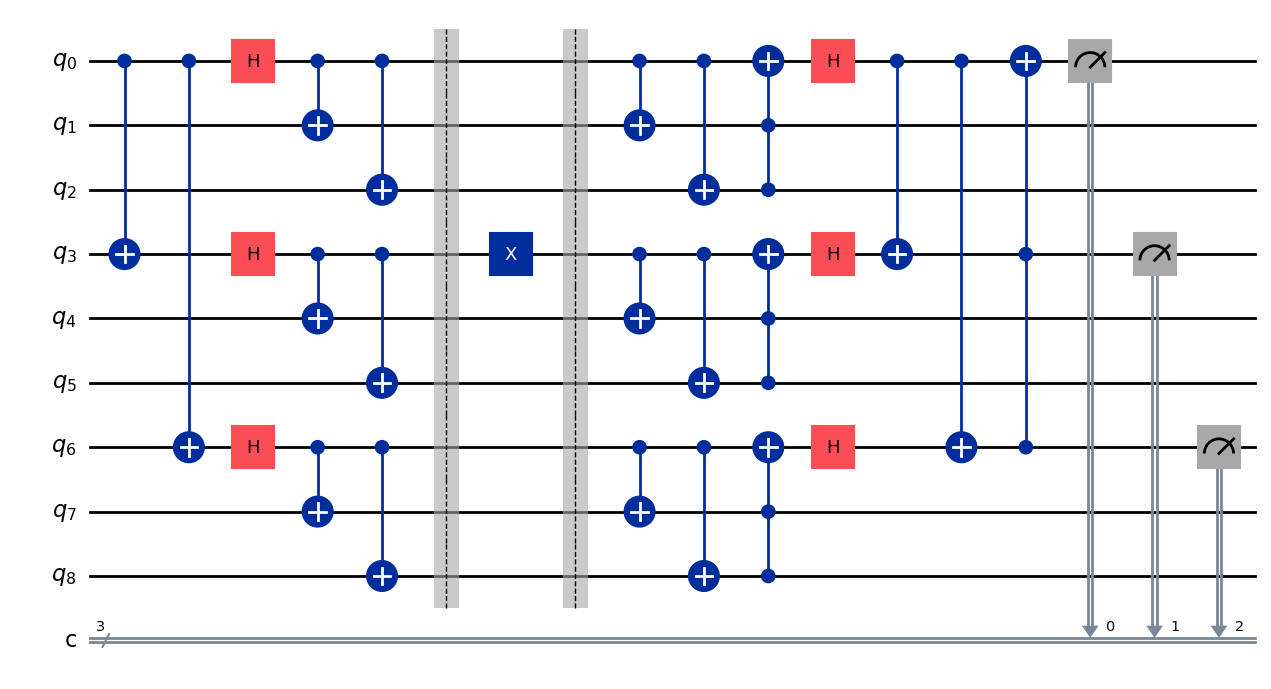

In [50]:
qc = QuantumCircuit(9, 3)

#qc.h(0)
#qc.t(0)
#qc.h(0)

qc.cx(0, 3)
qc.cx(0, 6)

qc.h(0)
qc.h(3)
qc.h(6)

qc.cx(0, 1)
qc.cx(0, 2)

qc.cx(3, 4)
qc.cx(3, 5)

qc.cx(6, 7)
qc.cx(6, 8)

# The errors
qc.barrier()

qc.x(3)

qc.barrier()

qc.cx(0, 1)
qc.cx(0, 2)

qc.cx(3, 4)
qc.cx(3, 5)

qc.cx(6, 7)
qc.cx(6, 8)

qc.ccx(2, 1, 0)
qc.ccx(5, 4, 3)
qc.ccx(8, 7, 6)

qc.h(0)
qc.h(3)
qc.h(6)

qc.cx(0, 3)
qc.cx(0, 6)

qc.ccx(6, 3, 0)

qc.measure(0, 0)
qc.measure(3, 1)
qc.measure(6, 2)

qc.draw(output='mpl')

{'000': 1024}


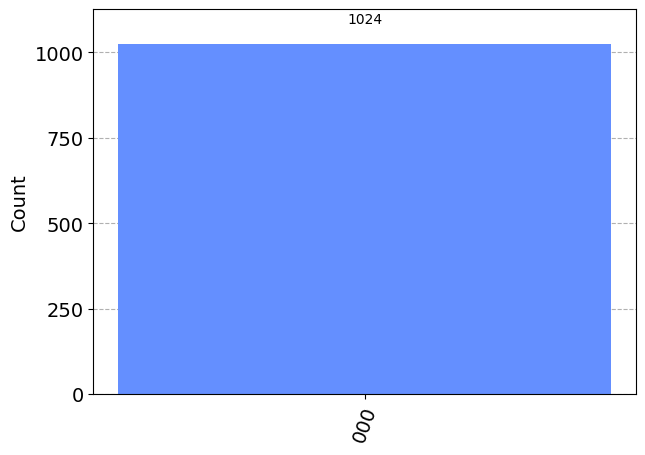

In [51]:
simulator = BasicSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts())